<a href="https://www.kaggle.com/code/nirmit27/imdb-movie-reviews?scriptVersionId=156369036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


### Loading the **dataset**

In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Analyzing and removing **duplicate values**

In [3]:
# df.info()
# df.duplicated().sum() # >>  418 duplicate rows

df = df.drop_duplicates()
print(f"Number of duplicate values = {df.duplicated().sum()}")

Number of duplicate values = 0


### Extracting **the first 10,000** reviews

In [4]:
df = df.iloc[:10000]
df.tail()

,review,sentiment
10012,I was pleasantly surprised to find that How to...,positive
10013,This is a very moving film that takes a new tw...,positive
10014,Apart from the beautiful imagery thanks to New...,negative
10015,This is a perfect series for family viewing. W...,positive
10016,"A really very bad movie, with a very few good ...",negative


# **_Data Cleaning_**
- ### For greater uniformity, converting uppercase to **lowercase**

In [5]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


- ### Removing leading and trailing **whitespaces**

In [6]:
df['review'] = df['review'].str.strip()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### **Auxiliary Functions for pattern substitutions**

In [7]:
import re
def rem_html(data):
    data = re.sub(r'<.*?>', '', data)
    return data
def rem_url(data):
    data = re.sub(r'https?://\S+|www\.\S+', '', data)
    return data

- ### Removing **HTML Tags** using **RegEx**

In [8]:
# df['review'] = df['review'].apply(rem_html)

# Alternatively ...
df['review'] = df['review'].str.replace(r'<.*?>', '', regex=True)

df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### _Checking the code for URLs_

In [9]:
# There were 26 such rows.
def check_for_urls():
    return df['review'].str.contains(r'https?://\S+|www\.\S+').value_counts()

# def check_for_urls():
#     return df[df['review'].str.contains(r'https?://\S+|www\.S+')].iloc[1].values

- ### Removing **URLs**

In [10]:
# df['review'] = df['review'].apply(rem_url)

# Alternatively ...
df['review'] = df['review'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

check_for_urls()

review
False    10000
Name: count, dtype: int64

- ### Expanding **abbreviations**

In [11]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

df['review'] = df['review'].apply(remove_abb)

df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


- ### **Spelling** corrections using the **textblob** library <br><br> _(Don't Run This!)_



In [12]:
from textblob import TextBlob

def spelling(data):
    return TextBlob(data).correct().string

# df['review'] = df['review'].apply(spelling)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


- ### Removing **Punctuations** using _string_ module

In [13]:
import string

def rem_punc(txt):
    for i in string.punctuation:
        txt = txt.replace(i, '')
    return txt

df['review'] = df['review'].apply(rem_punc)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


- ### Removing **special characters**

In [14]:
def rem_sp(txt):
    txt = re.sub('[^\w\s]', '', txt)
    return txt

df['review'] = df['review'].apply(rem_sp)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


# **_Preprocessing_**
- ### **Tokenization** at _word-level_

In [15]:
from nltk.tokenize import word_tokenize as tokenizer

df['tokenized_review'] = df['review'].apply(tokenizer)
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


- ### **Stopword** removal  <br><br>  _The removal of words that don't contribute to the **semantic** meaning of the sentence, such as 'is', 'the', 'from' etc._

In [16]:
from nltk.corpus import stopwords

def rem_stopword(tokens):
    res = []
    for token in tokens:
        if token not in stopwords.words("english"):
            res.append(token)
    return res

df['tokenized_review'] = df['tokenized_review'].apply(rem_stopword)
df['tokenized_review'].head()

0    [one, reviewers, mentioned, watching, 1, oz, e...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, family, little, boy, jake, thinks,...
4    [petter, matteis, love, time, money, visually,...
Name: tokenized_review, dtype: object

## **_E D A_** - _Feature Engineering_
- ### **Distribution** of text length / word count 
We are considering the **intuition** that number of characters can distinguish b/w negative and positive reviews, since **negative** ones are more likely to have **more** number of characters due to their **_longer_** size!

In [17]:
# Modifying the first column
df['review'] = df['tokenized_review'].apply(lambda x: " ".join(x))

# Features
df['char_length'] = df['review'].apply(len)
df['word_length'] = df['tokenized_review'].apply(len)

df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


### _Distribution Plot_ using **Seaborn**
#### We are able to infer from the plot that the MAJORITY of reviews have a character length in the range **(0, 1000)** and the MINORITY in the range **> 4000** characters.

<Axes: xlabel='char_length', ylabel='Count'>

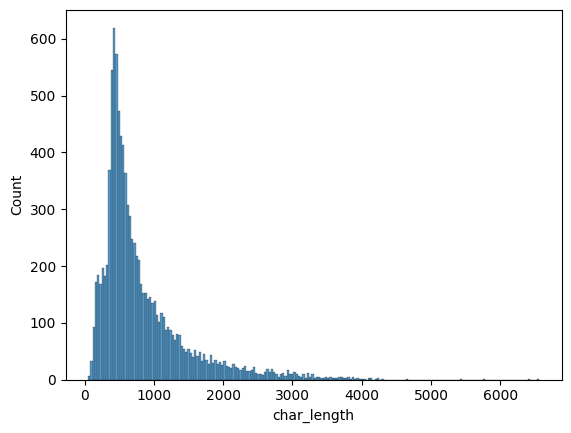

In [18]:
import seaborn as sns

sns.histplot(df['char_length'], kde=False, bins=200)

### Fetching the **POSITIVE and NEGATIVE reviews** seperately, we are not able to see the difference in the two plots' shape, and this shows that our created **feature** is not too helpful in differentiating between -ve and +ve reviews.

### 1) Using *char_length*

<Axes: xlabel='char_length', ylabel='Count'>

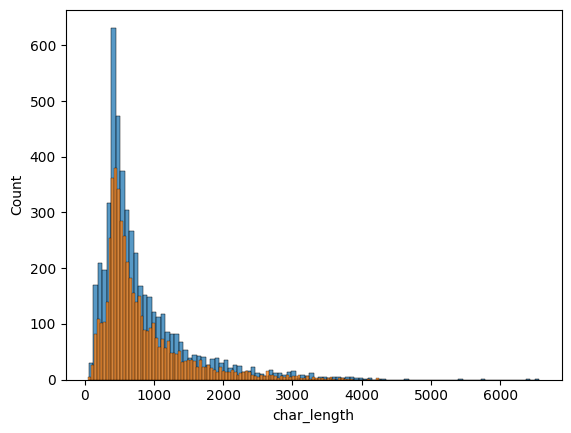

In [19]:
sns.histplot(df[df['sentiment'] == "positive"]['char_length'], kde=False, bins=100)
sns.histplot(df[df['sentiment'] == "negative"]['char_length'], kde=False, bins=100)

### 2) Using _word_length_

<Axes: xlabel='word_length', ylabel='Count'>

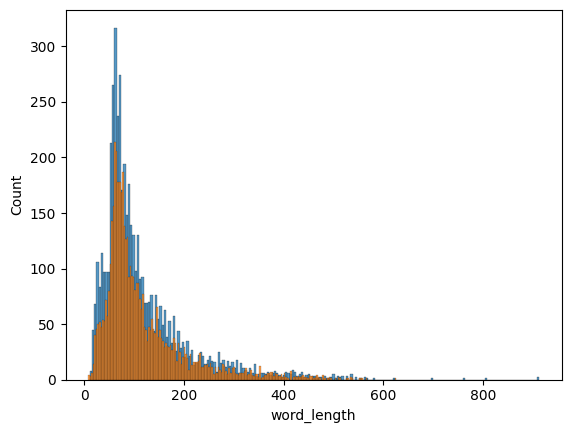

In [20]:
sns.histplot(df[df['sentiment'] == "positive"]['word_length'], kde=False, bins=200)
sns.histplot(df[df['sentiment'] == "negative"]['word_length'], kde=False, bins=200)

### **Bi-gram** Analysis
#### It can also help us in differentiating between +ve and -ve reviews.

In [21]:
# from nltk import ngrams

# pd.Series(ngrams(df['tokenized_review'].sum(), 2)).value_counts()

### **WorldCloud**
> Self-explanatory!

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### 1. For **positive** reviews

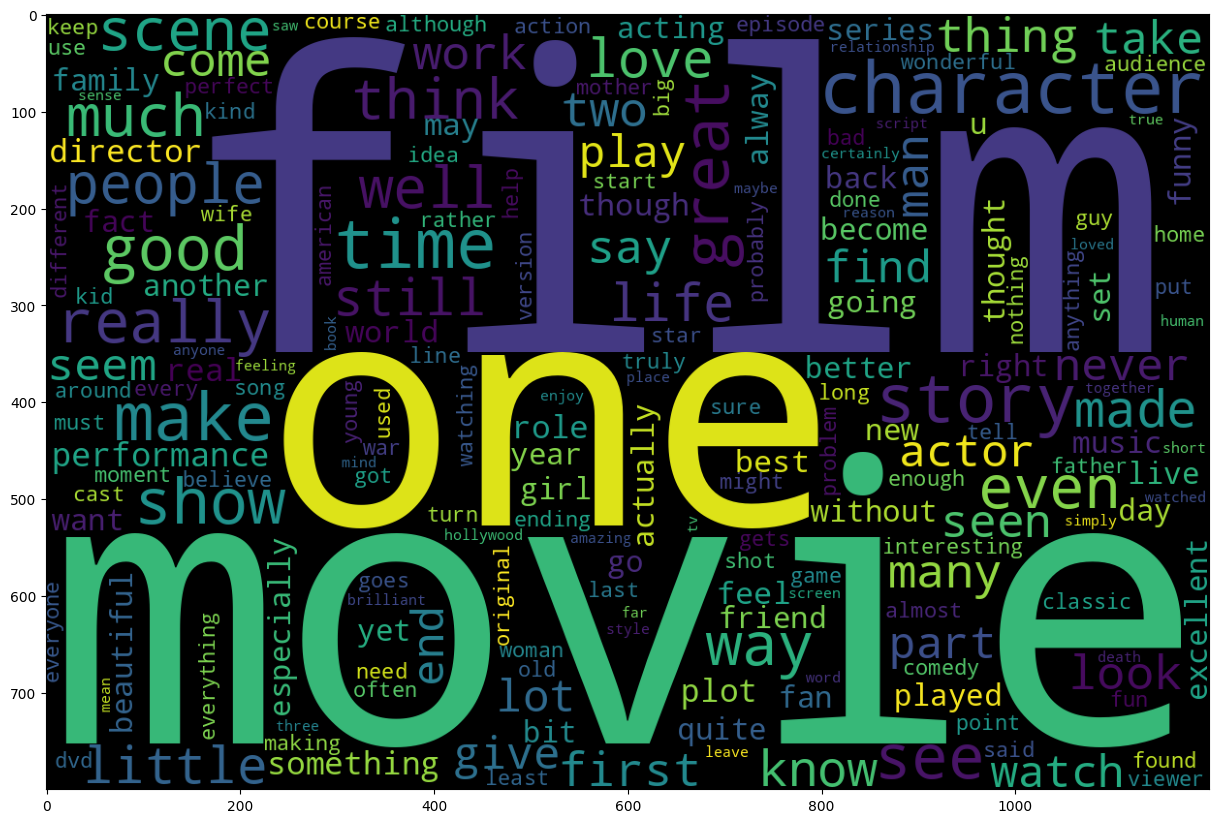

In [23]:
plt.figure(figsize=(15,15))
wc = WordCloud(width=1200, height=800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

#### 2. For **negative** reviews

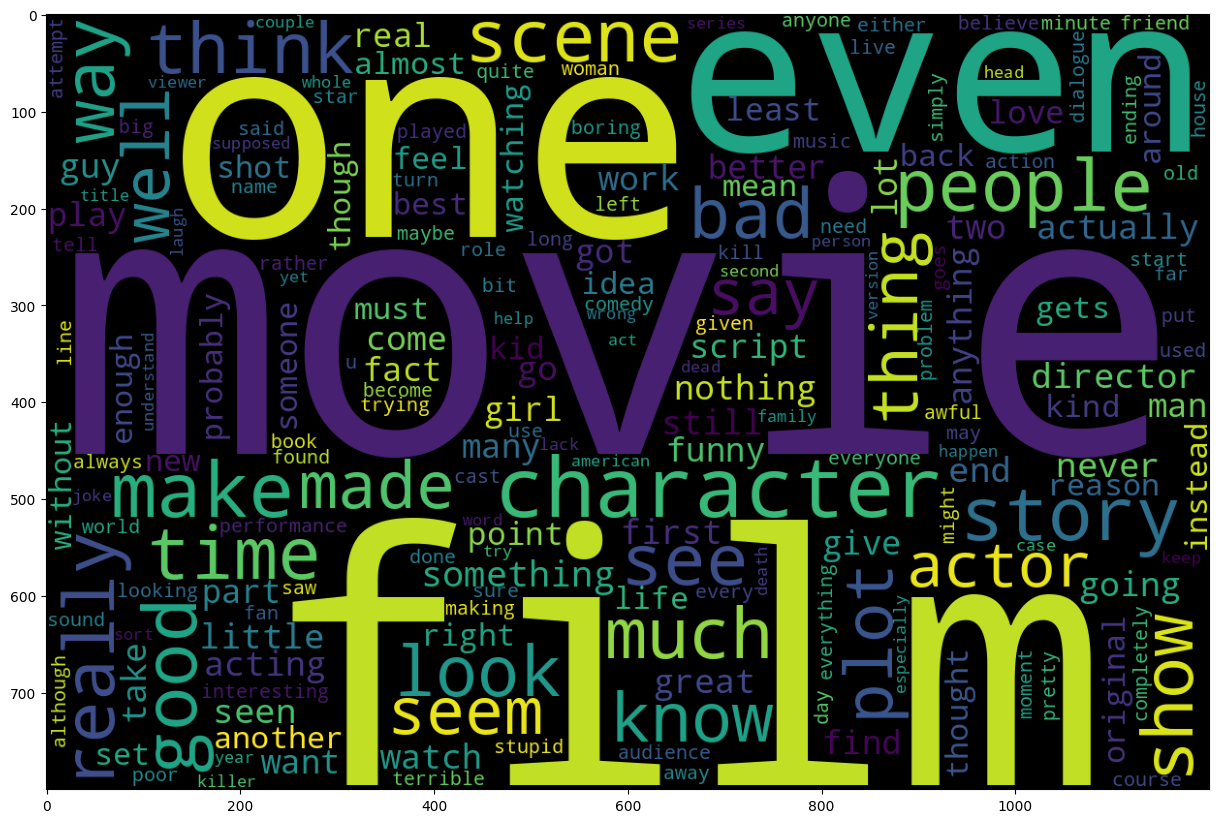

In [24]:
plt.figure(figsize=(15, 15))
wc = WordCloud(width=1200, height=800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

# **_Vectorization_**

### Conversion of ***textual*** data into ***vectors*** for the ML Models to crunch.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))              # picking the top 5000 best features as from unigrams to trigrams for vocab. 
bag_of_words = cv.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=cv.get_feature_names_out())
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **_P C A_**

### For bringing **HIGHER-dimensional** data to **LOWER-dimensions**.

<Axes: >

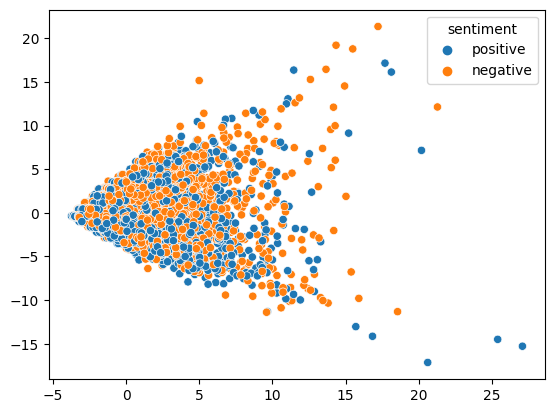

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
results = pca.fit_transform(bag_of_words.values)

# Plotting the lower-dimensional review data ...
sns.scatterplot(x = results[:,0], y = results[:,1] , hue = df['sentiment'])